# Overfitting and Early Stopping Demo

For a polynomial regression example.

First, we construct a random polynomial regression problem.

In [19]:
using PyPlot
using LinearAlgebra
using Statistics
using Random

In [8]:
# make a random dataset
Random.seed!(4565546);

n = 10;
x = 2 * rand(n) .- 1;
y = sin.(3*x) + 0.2 * randn(n);

n_va = 20;
x_va = 2 * rand(n_va) .- 1;
y_va = sin.(3*x_va) + 0.2 * randn(n_va);

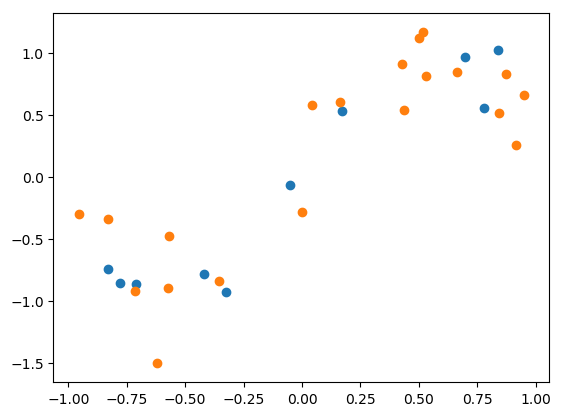

In [20]:
scatter(x,y; label="training points");
scatter(x_va, y_va; label="test points");

In [14]:
# polynomial features
d = 12;

function phi(x::Array{Float64})
    n = length(x);
    phi_x = ones(n, d);
    phi_x[:, 2] = x;
    for i = 3:d
        phi_x[:, i] = 2*x.*phi_x[:, i-1] - phi_x[:, i-2];
    end
    return phi_x;
end

phi_x = phi(x);
phi_x_va = phi(x_va);


In [15]:
function sgd(alpha::Float64, T::Int64)
    tr_losses = Float64[];
    va_losses = Float64[];
    
    w = zeros(d);
    ws = Array{Float64}[];
    
    for t = 1:T
        i = rand(1:n);
        w = w - alpha * (dot(w, phi_x[i,:]) - y[i]) * phi_x[i,:];
        tr_loss = mean([0.5 * (dot(w, phi_x[j,:]) - y[j])^2 for j = 1:n]);
        va_loss = mean([0.5 * (dot(w, phi_x_va[j,:]) - y_va[j])^2 for j = 1:n_va]);
        push!(tr_losses, tr_loss);
        push!(va_losses, va_loss);
        push!(ws, w)
    end
    
    return (tr_losses, va_losses, ws);
end

sgd (generic function with 1 method)

In [23]:
T = 5000;
(loss_tr, loss_va, ws_out) = sgd(0.02, T);

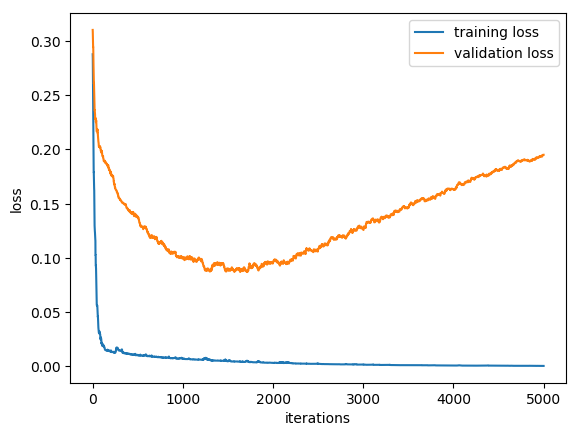

PyObject Text(24.000000000000007, 0.5, 'loss')

In [24]:
plot(collect(1:T), loss_tr; label="training loss");
plot(collect(1:T), loss_va; label="validation loss");
# ylim([-0.01,0.05]);
legend()
xlabel("iterations")
ylabel("loss")

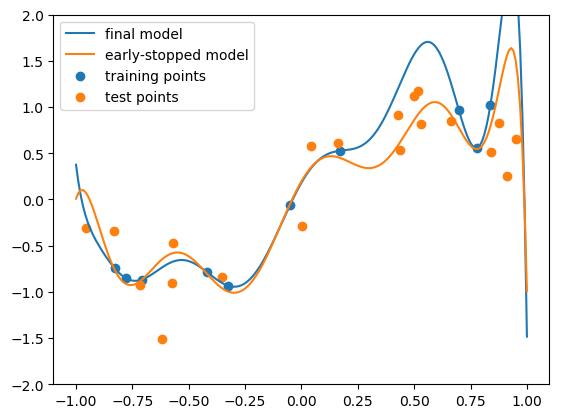

PyObject <matplotlib.legend.Legend object at 0x1461019b0>

In [18]:
scatter(x,y; label="training points");
scatter(x_va, y_va; label="test points");


x_m = collect(-1:0.01:1);
phi_x_m = phi(x_m);
plot(x_m, phi_x_m * ws_out[end]; label="final model");

plot(x_m, phi_x_m * ws_out[300]; label="early-stopped model");

# w_best = phi_x \ y;
# plot(x_m, phi_x_m * w_best);

ylim([-2.0,2.0]);

legend()